In [6]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Arrays with Numpy

In [7]:
x = [1.,3.,6.]
x+x

[1.0, 3.0, 6.0, 1.0, 3.0, 6.0]

In [9]:
y = np.array(x)
print(y+y)

[ 2.  6. 12.]


In [12]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [13]:
print(a*a)

[[ 1  4  9]
 [16 25 36]
 [49 64 81]]


In [14]:
np.dot(a,a) 

array([[ 30,  36,  42],
       [ 66,  81,  96],
       [102, 126, 150]])

In [15]:
np.dot(x,a)

array([55., 65., 75.])

In [16]:
# Transpuesta
print(a.T)

[[1 4 7]
 [2 5 8]
 [3 6 9]]


In [20]:
print(y.T, y)

(array([1., 3., 6.]), array([1., 3., 6.]))


In [19]:
np.matrix("1,2,3;4,5,6;7,8,9")

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [23]:
# Obtener valores y vectores propios

print(a)
evals, evecs = np.linalg.eig(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [24]:
print(evals)
print(evecs)

[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]


# Matriz para invertir

In [25]:
M = np.array([[3,-1,-1],[-1.,3.,1.],[2,1,4]])
print(M)
b = np.array([1.,3.,7.])
print(b)

[[ 3. -1. -1.]
 [-1.  3.  1.]
 [ 2.  1.  4.]]
[1. 3. 7.]


# Método de Jacobi

$$ x_{i}^{k+1} = \frac{1}{a_{ii}}( b_{i} - \sum_{i \neq j} a_{ij}x_{j}^{k} ), i = 1,2,3,... $$

In [26]:
print(M.shape[0]) # Filas
print(M.shape[1]) # Columnas

3
3


In [44]:
def GetJacobiMethod(Matrix, bvector, itmax, error):
    n = Matrix.shape[1]
    
    x = np.zeros(n)
    sumk = np.zeros(n)
    
    it = 0
    
    residuo = np.linalg.norm(bvector - np.dot(Matrix,x))
    
    while( residuo > error and it < itmax ):
        
        it += 1
        
        for i in range(len(Matrix[0,:])):
            sum_ = 0
            for j in range(len(Matrix[:,0])):
                if( i != j ):
                    sum_ += Matrix[i,j]*x[j]
            sumk[i] = sum_;
            
        for i in range(len(Matrix[0,:])):
            
            if(Matrix[i,i] != 0):
                x[i] = (bvector[i]-sumk[i])/Matrix[i,i]
                
            else:
                print('No invertible con Jacobi')
                return
            
        print(x,it)
        
        residuo = np.linalg.norm(bvector - np.dot(Matrix,x))
        
    return x,it,error

In [45]:
Xsol, it, error = GetJacobiMethod(M,b,30,1e-10)

(array([0.33333333, 1.        , 1.75      ]), 1)
(array([1.25      , 0.52777778, 1.33333333]), 2)
(array([0.9537037 , 0.97222222, 0.99305556]), 3)
(array([0.98842593, 0.98688272, 1.03009259]), 4)
(array([1.00565844, 0.98611111, 1.00906636]), 5)
(array([0.99839249, 0.99886403, 1.000643  ]), 6)
(array([0.99983568, 0.99924983, 1.00108775]), 7)
(array([1.00011253, 0.99958264, 1.0002697 ]), 8)
(array([0.99995078, 0.99994761, 1.00004808]), 9)
(array([0.99999856, 0.99996757, 1.00003771]), 10)
(array([1.00000176, 0.99998695, 1.00000883]), 11)
(array([0.99999859, 0.99999764, 1.00000238]), 12)
(array([1.00000001, 0.99999874, 1.00000129]), 13)
(array([1.00000001, 0.99999957, 1.00000031]), 14)
(array([0.99999996, 0.9999999 , 1.0000001 ]), 15)
(array([1.        , 0.99999995, 1.00000004]), 16)
(array([1.        , 0.99999999, 1.00000001]), 17)
(array([1., 1., 1.]), 18)
(array([1., 1., 1.]), 19)
(array([1., 1., 1.]), 20)
(array([1., 1., 1.]), 21)
(array([1., 1., 1.]), 22)
(array([1., 1., 1.]), 23)


In [37]:
def GetTMatrix(Matrix):
    
    D = np.zeros((Matrix.shape[0],Matrix.shape[1]))
    R = np.zeros((Matrix.shape[0],Matrix.shape[1]))
    T = np.zeros((Matrix.shape[0],Matrix.shape[1]))
    
    for i in range(len(Matrix[0,:])):
        for j in range(len(Matrix[:,0])):
            if(i==j):
                D[i,j] = 1./Matrix[i,j]
            else:
                R[i,j] = Matrix[i,j]
                
    T = np.dot(D,R)
    return T

In [38]:
T = GetTMatrix(M)
print(T)

[[ 0.         -0.33333333 -0.33333333]
 [-0.33333333  0.          0.33333333]
 [ 0.5         0.25        0.        ]]


In [42]:
evals, evecs = np.linalg.eig(T)
print(np.amax(abs(evals)))

0.33333333333333315


# Método de Gauss-Seidel

In [43]:
M = np.array([[3,-1,-1],[-1.,3.,1.],[2,1,4]])
b = np.array([1.,3.,7.])

In [48]:
def GetGaussSeidel(Matrix, bvector, itmax, error):
    
    n = Matrix.shape[1]
    x = np.zeros(n)
    
    r = np.linalg.norm(bvector - np.dot(Matrix,x))
    it = 0
    
    while r > error and it < itmax:
        
        it += 1
        
        for i in range(len(Matrix[0,:])):
            
            sum_ = 0
            
            for j in range(len(Matrix[:,0])):
                
                if( i != j ):
                    sum_ += Matrix[i,j]*x[j]
                    
            x[i] = (bvector[i]-sum_)/Matrix[i,i]
            
        print(x,it)
        
        r = np.linalg.norm(bvector - np.dot(Matrix,x)) 
            
    return x,r,it        

In [49]:
Xsol,r,it = GetGaussSeidel(M,b,30,1e-10)

(array([0.33333333, 1.11111111, 1.30555556]), 1)
(array([1.13888889, 0.94444444, 0.94444444]), 2)
(array([0.96296296, 1.00617284, 1.01697531]), 3)
(array([1.00771605, 0.99691358, 0.99691358]), 4)
(array([0.99794239, 1.00034294, 1.00094307]), 5)
(array([1.00042867, 0.99982853, 0.99982853]), 6)
(array([0.99988569, 1.00001905, 1.00005239]), 7)
(array([1.00002381, 0.99999047, 0.99999047]), 8)
(array([0.99999365, 1.00000106, 1.00000291]), 9)
(array([1.00000132, 0.99999947, 0.99999947]), 10)
(array([0.99999965, 1.00000006, 1.00000016]), 11)
(array([1.00000007, 0.99999997, 0.99999997]), 12)
(array([0.99999998, 1.        , 1.00000001]), 13)
(array([1., 1., 1.]), 14)
(array([1., 1., 1.]), 15)
(array([1., 1., 1.]), 16)
(array([1., 1., 1.]), 17)
(array([1., 1., 1.]), 18)


# Usando Numpy

In [50]:
Sol = np.linalg.solve(M,b)
print(Sol)

[1. 1. 1.]


In [51]:
x = np.linspace(0.,2.,20)
y = np.linspace(0.,2.,20)
X,Y = np.meshgrid(x,y)

In [56]:
Z1 = (b[0]-M[0,0]*X-M[0,1]*Y)/M[0,2]
Z2 = (b[1]-M[1,0]*X-M[1,1]*Y)/M[1,2]
Z3 = (b[2]-M[2,0]*X-M[2,1]*Y)/M[2,2]

<IPython.core.display.Javascript object>


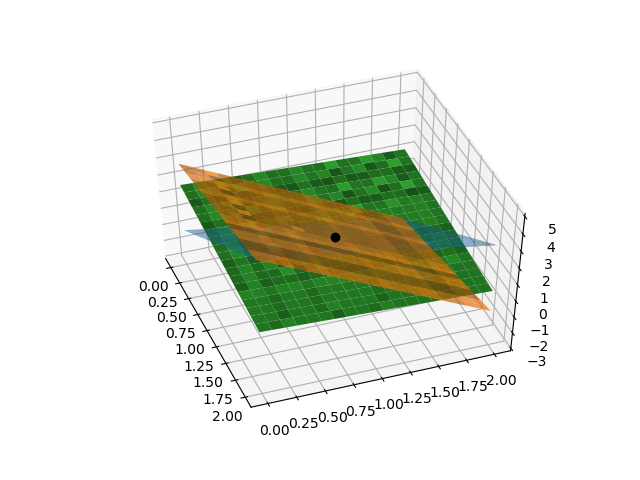

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z1,alpha=0.5)
ax.plot_surface(X,Y,Z2,alpha=0.7)
ax.plot_surface(X,Y,Z3,alpha=1.0)
ax.plot( (Sol[0],), (Sol[1],), (Sol[1],), lw=2, c='k',marker='o' )
plt.show()